In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [81]:
def draw_box(boxes, c='k'):
    x1 = boxes[:,0]
    y1 = boxes[:,1]
    x2 = boxes[:,2]
    y2 = boxes[:,3]
    
    plt.plot([x1,x2], [y1,y1], c)
    plt.plot([x1,x1], [y1,y2], c)
    plt.plot([x1,x2], [y2,y2], c)
    plt.plot([x2,x2], [y1,y2], c)
    plt.title("nms")

In [82]:
def nms_calculation(dets, thresh):
    # 先把所有bbox的每一列要素提取出来（为了之后比较score方便）
    x1 = dets[:, 0]
    x2 = dets[:, 1]
    y1 = dets[:, 2]
    y2 = dets[:, 3]
    score = dets[:, 4]
    area = (x2-x1+1) * (y2-y1+1)
    
    # 按score顺序提取bbox的index
    idx = np.argsort(score)[::-1]                                   # 注意：np.argsort输出的是从小到大的排序，所以把它倒序一下
    res = []
    
    while idx.size > 0:
        # 每次把当前score排第一的bbox取出来放入res中
        print("ranked idx: ", idx)
        max_idx = idx[0]
        print("max_index: ", max_idx)
        res.append(max_idx)
        
        # 然后计算其他所有bbox与它的iou
        x_min = np.maximum(x1[max_idx], x1[idx[1:]])        # 利用广播机制进行1对多计算，x_min结果也是一个与idx[1:]对齐的向量
        x_max = np.minimum(x2[max_idx], x2[idx[1:]])
        y_min = np.maximum(y1[max_idx], y1[idx[1:]])
        y_max = np.minimum(y2[max_idx], y2[idx[1:]])
        overlap = np.maximum(0, x_max - x_min + 1) * np.maximum(0, y_max - y_min + 1)
        iou = overlap / (area[max_idx] + area[idx[1:]] - overlap)

        # 然后把与其IoU > thresh的bbox删除掉
        print("IoU: ", iou, "shape: ", iou.shape)
        keep_idx = np.where(iou <= thresh)[0]              # 关键点：这里np.where(iou <= thresh)[0] 是一个固定写法，用于提取符合条件的index
        print("keep_idx: ", keep_idx)
        print(" ")
        idx = idx[keep_idx + 1]                                   # 这里需要+1，因为iou计算时的下标0~N对应的是idx中的下标1～N+1
    
    # 最后输出res
    return res

ranked idx:  [2 5 4 1 3 0]
max_index:  2
IoU:  [0.03846154 0.         0.         0.         0.        ] shape:  (5,)
keep_idx:  [0 1 2 3 4]
 
ranked idx:  [5 4 1 3 0]
max_index:  5
IoU:  [0.01734104 0.         0.         0.        ] shape:  (4,)
keep_idx:  [0 1 2 3]
 
ranked idx:  [4 1 3 0]
max_index:  4
IoU:  [0. 0. 0.] shape:  (3,)
keep_idx:  [0 1 2]
 
ranked idx:  [1 3 0]
max_index:  1
IoU:  [0. 0.] shape:  (2,)
keep_idx:  [0 1]
 
ranked idx:  [3 0]
max_index:  3
IoU:  [1.] shape:  (1,)
keep_idx:  []
 
[2, 5, 4, 1, 3]


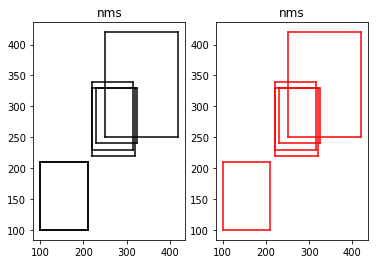

In [85]:
dets = np.array([[100,100,210,210,0.72],
        [250,250,420,420,0.8],
        [220,220,320,330,0.92],
        [100,100,210,210,0.72],
        [230,240,325,330,0.81],
        [220,230,315,340,0.9]])

plt.figure(1)
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
 
# 绘制原始bbox
plt.sca(ax1)
draw_box(dets)

# 进行nms处理
keep_idx = nms_calculation(dets, 0.5)
print(keep_idx)

# 绘制nms后的bbox
plt.sca(ax2)
draw_box(dets[keep_idx], 'r')
plt.show()